In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

In [3]:
!rm -r modules

In [4]:
# import modules
import requests
from pathlib import Path
import os


directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)
     

In [5]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement

# Quantum Shifters

In [6]:
QUBIT_NUM = 6
MEASUREMENT_NUM = 4

## Right Shifter

In [7]:
qr = QuantumRegister(QUBIT_NUM)
cr = ClassicalRegister(MEASUREMENT_NUM)
qc = QuantumCircuit(qr,cr)

In [8]:
# initialize the quantum circuit 
target_qubits = [0,2,4]
initialize_quantum_circuit(qc,target_qubits)

In [9]:
qc.barrier()

In [10]:
# implement quantum circuit
qc.cswap(qr[0],qr[1],qr[2])
qc.cswap(qr[0],qr[2],qr[3])
qc.cswap(qr[0],qr[3],qr[4])
qc.cswap(qr[0],qr[4],qr[5])

In [11]:
qc.barrier()

In [12]:
target_qubits = [1,2,3,4]
for (c,q) in enumerate(target_qubits):
  qc.measure(qr[q],cr[c])

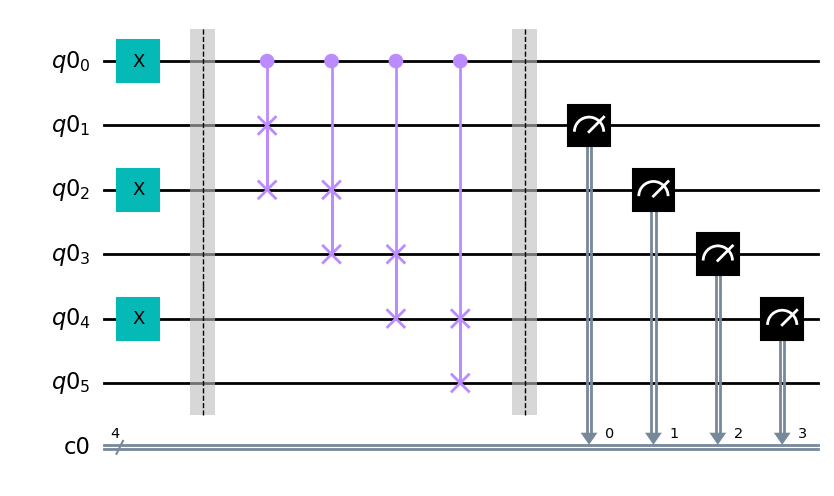

In [13]:
qc.draw("mpl")

In [14]:
output = ideal_qc_simulation(qc,backend,1)

In [15]:
output = list(output.keys())[0]

In [16]:
output = reverse_output(output)

In [17]:
output

'1010'

## Left Shifter

In [18]:
qr = QuantumRegister(QUBIT_NUM)
cr = ClassicalRegister(MEASUREMENT_NUM)
qc = QuantumCircuit(qr,cr)

In [19]:
# initialize the quantum circuit 
target_qubits = [0,1,3]
initialize_quantum_circuit(qc,target_qubits)

In [20]:
qc.barrier()

In [21]:
# implement quantum circuit
qc.cswap(qr[0],qr[4],qr[5])
qc.cswap(qr[0],qr[3],qr[4])
qc.cswap(qr[0],qr[2],qr[3])
qc.cswap(qr[0],qr[1],qr[2])

In [22]:
qc.barrier()

In [23]:
target_qubits = [1,2,3,4]
for (c,q) in enumerate(target_qubits):
  qc.measure(qr[q],cr[c])

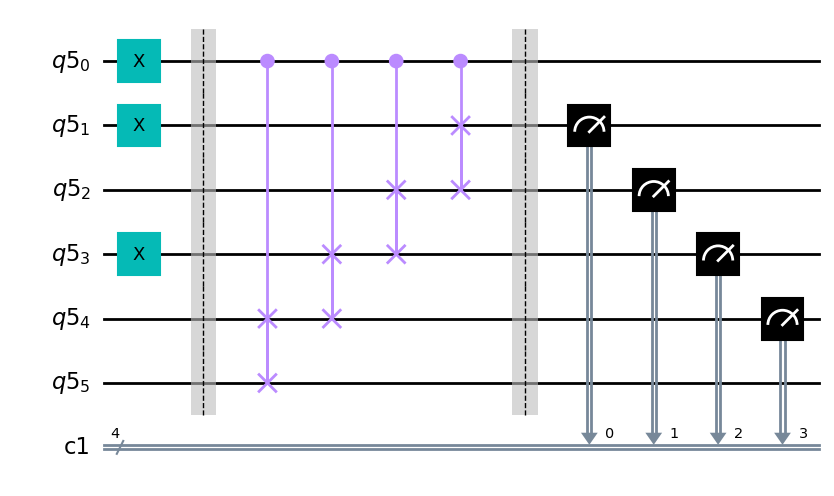

In [24]:
qc.draw("mpl")

In [25]:
output = ideal_qc_simulation(qc,backend,1)

In [26]:
output = list(output.keys())[0]

In [27]:
output = reverse_output(output)

In [28]:
output

'0101'

# Quantum Rotator

In [29]:
QUBIT_NUM = 6
MEASUREMENT_NUM = 5

## Right Rotator


In [30]:
qr = QuantumRegister(QUBIT_NUM)
cr = ClassicalRegister(MEASUREMENT_NUM)
qc = QuantumCircuit(qr,cr)

In [31]:
# initialize the quantum circuit 
target_qubits = [0,1,2,3]
initialize_quantum_circuit(qc,target_qubits)

In [32]:
qc.barrier()

In [33]:
# implement quantum circuit
qc.cswap(qr[0],qr[1],qr[2])
qc.cswap(qr[0],qr[2],qr[3])
qc.cswap(qr[0],qr[3],qr[4])
qc.cswap(qr[0],qr[4],qr[5])

In [34]:
qc.barrier()

In [35]:
target_qubits = [1,2,3,4,5]
for (c,q) in enumerate(target_qubits):
  qc.measure(qr[q],cr[c])

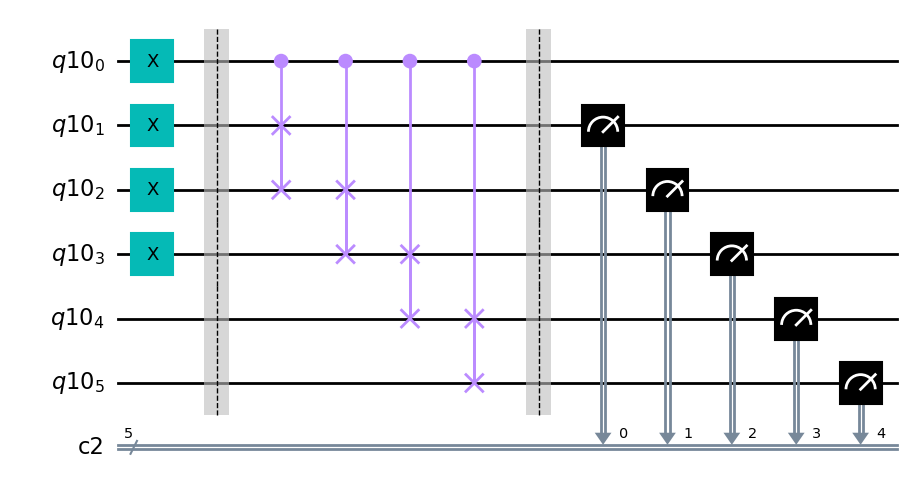

In [36]:
qc.draw("mpl")

In [37]:
output = ideal_qc_simulation(qc,backend,1)

In [38]:
output = list(output.keys())[0]

In [39]:
output

'10011'

## Left Rotator

In [40]:
qr = QuantumRegister(QUBIT_NUM)
cr = ClassicalRegister(MEASUREMENT_NUM)
qc = QuantumCircuit(qr,cr)

In [41]:
target_qubits = [0,3,4,5]
initialize_quantum_circuit(qc,target_qubits)

In [42]:
qc.barrier()

In [43]:
# implement quantum circuit
qc.cswap(qr[0],qr[4],qr[5])
qc.cswap(qr[0],qr[3],qr[4])
qc.cswap(qr[0],qr[2],qr[3])
qc.cswap(qr[0],qr[1],qr[2])

In [44]:
qc.barrier()

In [45]:
target_qubits = [1,2,3,4,5]
for (c,q) in enumerate(target_qubits):
  qc.measure(qr[q],cr[c])

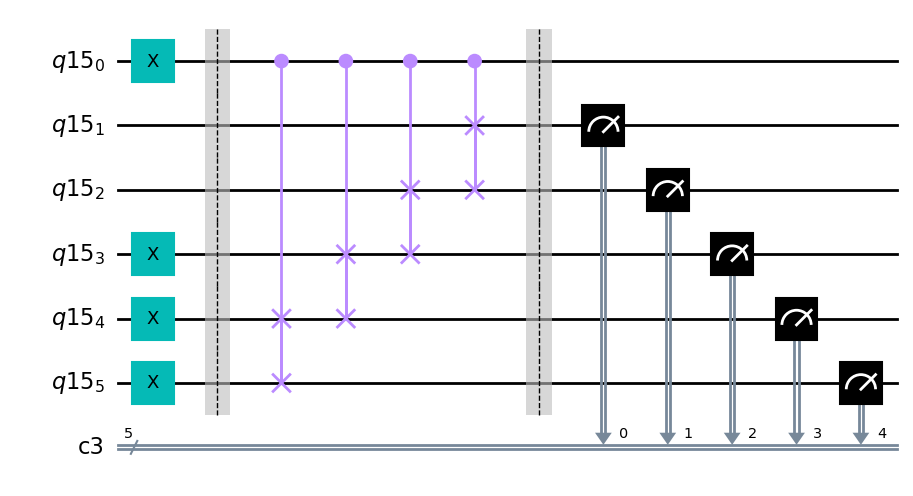

In [46]:
qc.draw("mpl")

In [47]:
output = ideal_qc_simulation(qc,backend,1)

In [48]:
output = list(output.keys())[0]

In [49]:
output

'11001'

In [50]:
def right_shifter_rotator(initialize_quantum_state = False):
  QUBIT_NUM = 6
  qr = QuantumRegister(QUBIT_NUM)
  qc = QuantumCircuit(qr)
  # initialized ket 0 to |1>
  if initialize_quantum_state:
    qc.x(qr[0])
  # implement quantum circuit
  qc.cswap(qr[0],qr[1],qr[2])
  qc.cswap(qr[0],qr[2],qr[3])
  qc.cswap(qr[0],qr[3],qr[4])
  qc.cswap(qr[0],qr[4],qr[5])
  return qc

def left_shifter_rotator(initialize_quantum_state = False):
  QUBIT_NUM = 6
  qr = QuantumRegister(QUBIT_NUM)
  qc = QuantumCircuit(qr)
  # initialized ket 0 to |1>
  if initialize_quantum_state:
    qc.x(qr[0])
  # implement quantum circuit
  qc.cswap(qr[0],qr[4],qr[5])
  qc.cswap(qr[0],qr[3],qr[4])
  qc.cswap(qr[0],qr[2],qr[3])
  qc.cswap(qr[0],qr[1],qr[2])
  return qc